In [28]:
import pandas as pd
from collections import defaultdict, OrderedDict
from matplotlib import pyplot as plt
%matplotlib inline

In [29]:
N=30

In [30]:
playlists = pd.read_pickle("../data/final_spotify_playlists.pkl")[:N]
songs = pd.read_pickle('../data/songs.pkl')[:N]

songs['artist']=songs['artists'].apply(lambda x: x[0][1])

In [31]:
id2playlist = OrderedDict({j:i for i,j in enumerate(playlists.index)})
id2artist = OrderedDict({j:i for i,j in enumerate(songs.artist)})

In [32]:
import networkx as nx
from networkx.algorithms import bipartite
spotify = nx.Graph()

spotify.add_nodes_from(map(lambda p: id2playlist[p], playlists.index), bipartite=0)
spotify.add_nodes_from(map(lambda a: id2artist[a], songs['artist'].unique()), bipartite=1)

for artist, group in songs[['artist','playlists']].groupby('artist'):
    for playlists in group['playlists'].values:
        for playlist in playlists:
            
            if artist not in id2artist:
                id2artist[artist] = id2artist[next(reversed(id2artist))]+1
            
            if playlist not in id2playlist:
                id2playlist[playlist] = id2playlist[next(reversed(id2playlist))]+1
            
            spotify.add_edge(id2artist[artist], id2playlist[playlist])

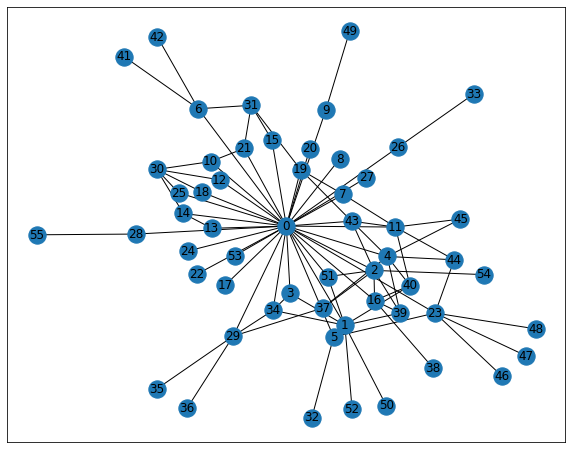

In [33]:
fig = plt.figure(figsize=(10,8))
nx.draw_networkx(spotify)